<a href="https://colab.research.google.com/github/saasha2926/ML-Projects-/blob/main/Energy_Consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('Energy_consumption.csv')
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [ ]:
if 'DayOfWeek' in df.columns:
  df.drop('DayOfWeek', axis=1, inplace=True)
if 'Timestamp' in df.columns:
  df.drop('Timestamp',axis = 1,inplace = True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,No,75.364373
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,No,83.401855
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,No,78.270888
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,No,56.519850
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,No,70.811732


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
df['LightingUsage'] = labelencoder.fit_transform(df['LightingUsage'])
df['Holiday'] = labelencoder.fit_transform(df['Holiday'])
df['HVACUsage'] = labelencoder.fit_transform(df['HVACUsage'])


In [ ]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732


<Axes: >

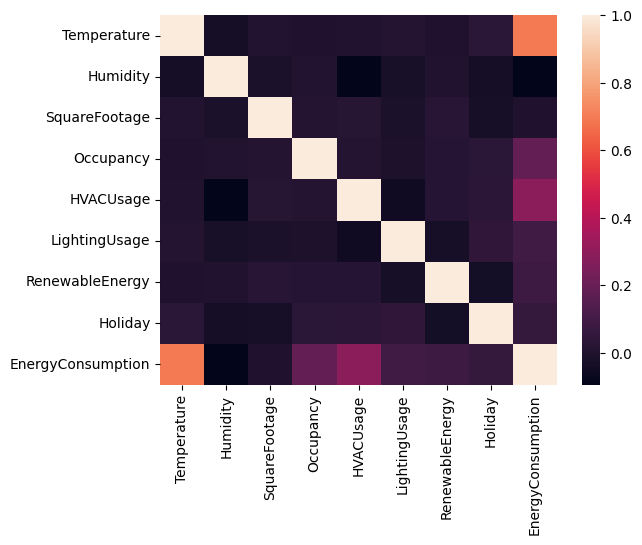

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732


In [ ]:
x = df.iloc[:,0:7]
y = df.iloc[:,8]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)
print(y_pred)


[87.60047781 77.27214589 77.02216248 71.58574071 73.4284149  82.3385462
 79.80709316 79.42391371 77.37878811 85.70880801 83.74308655 73.32974568
 73.37548266 70.36813693 70.97990575 71.06360761 82.47542311 79.14789789
 78.42601551 73.56615898 68.51440949 87.3894187  88.28550328 77.13546466
 79.85334896 66.73327742 86.79843176 82.40623332 74.20492594 83.97006943
 75.60315136 71.78765236 71.35184008 73.2014455  85.8860445  78.97572938
 80.84412211 77.85136054 72.75699701 82.23835044 79.23910674 73.88753242
 72.01609224 88.17203387 83.11292434 80.20145866 71.10734842 88.91130209
 68.94384361 73.57959167 80.53313863 63.21376001 80.03060996 74.39160175
 91.41663278 82.9174231  78.30129751 76.71304253 75.56509447 67.16903076
 80.79827426 72.27748788 76.41325705 70.77785433 81.25526478 77.34606631
 84.54638713 73.76629954 83.59720175 77.04785694 85.35206816 74.55988068
 77.00437499 88.52960238 78.65239964 73.41776988 81.74011869 77.72950979
 71.367866   78.43205969 73.83236307 74.64199215 81.

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[ 1.97016733e+00 -5.48482392e-02  8.53878570e-05  5.02765745e-01
  4.52016972e+00  2.00884798e+00  4.99802188e-02]
24.06486519727723


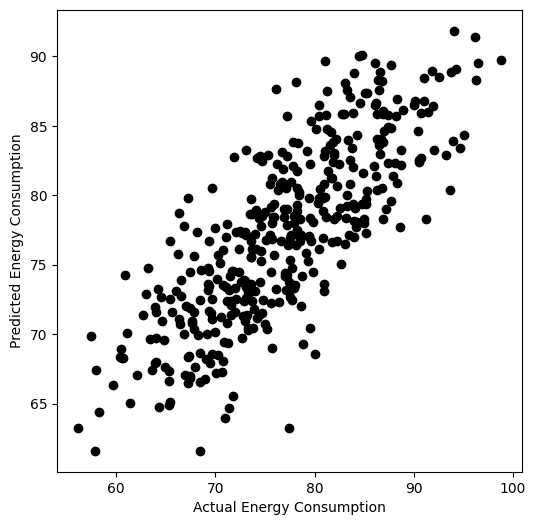

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(y_test,y_pred,color = 'black')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 25.429343395257074
Root Mean Squared Error: 5.042751569853216
R^2 Score: 0.6274324352044651


In [1]:
!pip install flask pyngrok


In [10]:


# Set up your authtoken (replace YOUR_AUTHTOKEN with the actual token)
!ngrok config add-authtoken 2rDPPBENwptpqn4xkVy7QpLnamo_5we11vKS1eanPBkuC2pRE

from flask import Flask, request, render_template
from pyngrok import ngrok
from threading import Thread
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Initialize Flask app
app = Flask(__name__)

# Function to analyze energy data and create a plot
def analyze_energy_data(data):
    df = pd.DataFrame(data, columns=['Date', 'Consumption'])
    df['Date'] = pd.to_datetime(df['Date'])
    df['Consumption'] = pd.to_numeric(df['Consumption'])

    # Generate a plot
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Consumption'], marker='o')
    plt.title('Energy Consumption Over Time')
    plt.xlabel('Date')
    plt.ylabel('Consumption')
    plt.grid()

    # Convert plot to PNG image
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_png = buf.getvalue()
    buf.close()
    image_base64 = base64.b64encode(image_png).decode('utf-8')

    return image_base64

# Route to display the form where users can input data
@app.route('/')
def home():
    return '''
        <h1>Energy Consumption Analysis</h1>
        <form action="/analyze" method="post">
            <label for="data">Enter your energy data (date, consumption):</label><br>
            <textarea id="data" name="data" rows="10" cols="50">2023-01-01,100\n2023-01-02,150</textarea><br>
            <input type="submit" value="Analyze">
        </form>
    '''

# Route to process the form and generate analysis
@app.route('/analyze', methods=['POST'])
def analyze():
    # Get the form data
    raw_data = request.form['data']
    lines = raw_data.strip().split('\n')
    data = [line.split(',') for line in lines]

    try:
        # Generate plot
        image_base64 = analyze_energy_data(data)
        # Return the result with the generated plot
        return f'''
            <h1>Analysis Results</h1>
            <img src="data:image/png;base64,{image_base64}" alt="Energy Analysis Plot">
            <br><br>
            <a href="/">Go Back</a>
        '''
    except Exception as e:
        return f"Error processing data: {e}. <a href='/'>Try Again</a>"

# Function to run the Flask app
def run_app():
    app.run(port=5002)

# Expose the Flask app to the internet using ngrok
public_url = ngrok.connect(5002)
print(f"Access your app here: {public_url}")

# Run the Flask app in a separate thread
flask_thread = Thread(target=run_app)
flask_thread.start()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Access your app here: NgrokTunnel: "https://a21b-34-133-30-172.ngrok-free.app" -> "http://localhost:5002"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5002
INFO:werkzeug:Press CTRL+C to quit
